# PJ1 Aggregate 1

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [3]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\PJ1_Agg1.stl')

Number of points: 357321
Number of elements:
  triangle: 718812

In [2]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PJ1_Agg1.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.018711 0.017566 0.014209]
 [0.018697 0.017576 0.014209]
 [0.018711 0.017576 0.014206]
 ...
 [0.01691  0.01799  0.019341]
 [0.016928 0.01799  0.019342]
 [0.016946 0.01799  0.019341]]


In [5]:
print(aggregate_coord.shape)

(357321, 3)


## 2) Bounding box

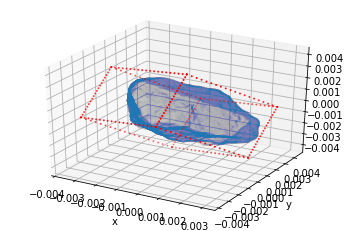

In [3]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [6]:
print(bbox_aggregate)

{'angles': array([0.7899162 , 0.43536023]), 'volume': 1.1566101824352354e-07}


## 3) Bounding ellipsoid

In [4]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-13)

In [8]:
print(bounding_ellipsoid)

{'volume': 1.3362835456593577e-07, 'a': 0.0030606662398387943, 'b': 0.0027196324309021374, 'c': 0.003832514678933558, 'bbox': {'angles': array([0.7899162 , 0.43536023]), 'volume': 1.1566101824352354e-07}}


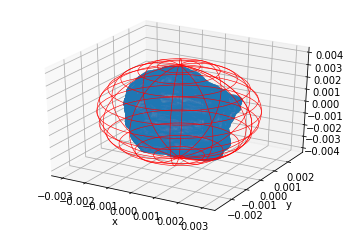

In [15]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.001)

## 4) Included ellipsoid

In [5]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [11]:
print(included_ellipsoid)

{'volume': 1.3414040610037635e-08, 'a': 0.0014224476926992806, 'b': 0.0012639518892888614, 'c': 0.0017811650258776, 'bbox': {'angles': array([0.7899162 , 0.43536023]), 'volume': 1.1566101824352354e-07}}


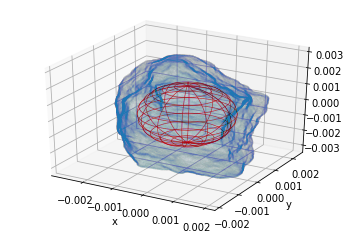

In [14]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [6]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [6]:
print(middle_ellipsoid)

{'volume': 5.249283668409056e-08, 'a': 0.0022415569662690375, 'b': 0.0019917921600954994, 'c': 0.0028068398524055786}


## 6) Indicators

In [7]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [8]:
tomo_surface = 7.8162739e-005
tomo_volume = 4.633214e-008 

Aggregate standard sphericity =  0.7981280878182759
Bounding box and ellispoids ratios :
a/b = 1.1253970224290684
a/c = 0.7986052230047715
b/c = 0.7096208778667762
a^2/bc = 0.8987479400658721
Bounding ellipsoid surface / Included ellipsoid surface = 4.629769141923483
Aggregate tomographed surface / Bounding ellipsoid surface = 0.6087389748119542
Aggregate tomographed surface / Middle ellipsoid surface = 1.1349154130181196
Aggregate tomographed surface / Included ellipsoid surface = 2.8183209210705216
Roughness map (middle ellipsoid)
Mean absolute roughness distance = 0.0004122296725165272
data min max
theta 9.457817583695428e-05 6.282831257424613
phi 0.004219232299439599 3.1383202391324323
alpha 0.00010643799738909792 6.282786860643984
beta 0.005337890449743798 3.137452607855448
distance -0.000978281037359991 0.001317215427583201


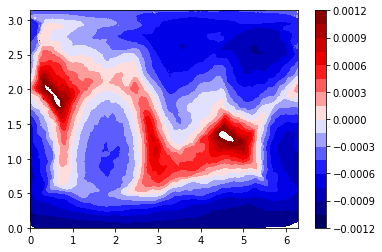

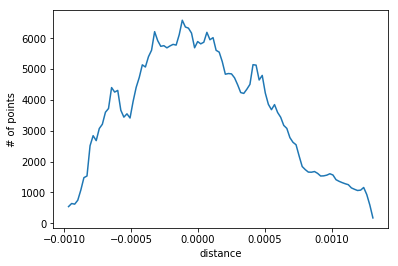

In [13]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0012)

In [11]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

Aggregate standard sphericity =  0.7981280878182759
Bounding box and ellispoids ratios :
a/b = 1.1253970224290684
a/c = 0.7986052230047715
b/c = 0.7096208778667762
a^2/bc = 0.8987479400658721
Bounding ellipsoid surface / Included ellipsoid surface = 4.629769141923483
Aggregate tomographed surface / Bounding ellipsoid surface = 0.6087389748119542
Aggregate tomographed surface / Middle ellipsoid surface = 1.1349154130181196
Aggregate tomographed surface / Included ellipsoid surface = 2.8183209210705216
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004122296725165272
 
data min max
theta 9.457817583695428e-05 6.282831257424613
phi 0.004219232299439599 3.1383202391324323
alpha 0.00010643799738909792 6.282786860643984
beta 0.005337890449743798 3.137452607855448
distance -0.000978281037359991 0.001317215427583201


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

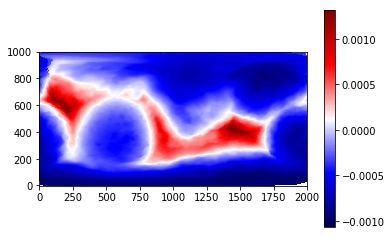

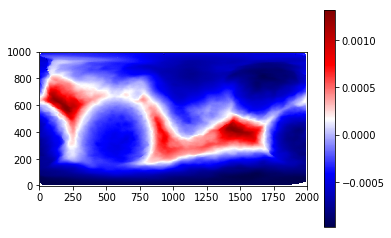

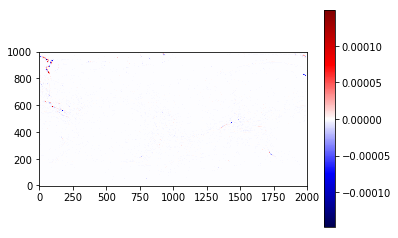

{'aggregate_standard_sphericity': 0.7981280878182759,
 'a/b': 1.1253970224290684,
 'a/c': 0.7986052230047715,
 'b/c': 0.7096208778667762,
 'a^2/bc': 0.8987479400658721,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 4.629769141923483,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.6087389748119542,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.1349154130181196,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 2.8183209210705216,
 'roughness_distance': array([[4.85003277e-01, 2.93891407e+00, 2.36298727e-05, 5.35307908e-01,
         2.88285326e+00],
        [5.12714535e-01, 2.94154872e+00, 2.17282569e-05, 5.64700830e-01,
         2.88544368e+00],
        [5.00604033e-01, 2.93747342e+00, 2.83311974e-05, 5.51876557e-01,
         2.88063900e+00],
        ...,
        [2.65703598e+00, 5.51337155e-01, 2.29022424e-04, 2.60675985e+00,
         6.69830419e-01],
        [2.65128184e+00, 5.46320167e-01, 2.18944879e-04, 2.60064184e+00,
        

In [ ]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0015, sigma=1)

Aggregate standard sphericity =  0.7981280878182759
Bounding box and ellispoids ratios :
a/b = 1.1253970224290684
a/c = 0.7986052230047715
b/c = 0.7096208778667762
a^2/bc = 0.8987479400658721
Bounding ellipsoid surface / Included ellipsoid surface = 4.629769141923483
Aggregate tomographed surface / Bounding ellipsoid surface = 0.6087389748119542
Aggregate tomographed surface / Middle ellipsoid surface = 1.1349154130181196
Aggregate tomographed surface / Included ellipsoid surface = 2.8183209210705216
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004122296725165272
 
data min max
theta 9.457817583695428e-05 6.282831257424613
phi 0.004219232299439599 3.1383202391324323
alpha 0.00010643799738909792 6.282786860643984
beta 0.005337890449743798 3.137452607855448
distance -0.000978281037359991 0.001317215427583201


C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:229: RuntimeWarning: invalid value encountered in less
  # outside of my range of interest
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:229: RuntimeWarning: invalid value encountered in greater
  # outside of my range of interest
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:230: RuntimeWarning: invalid value encountered in less
  zmin = -scale_maxvalue
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:230: RuntimeWarning: invalid value encountered in greater
  zmin = -scale_maxvalue


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

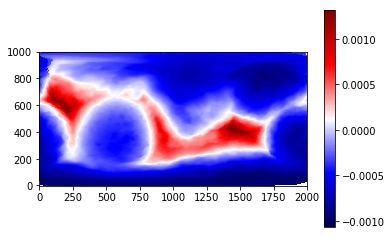

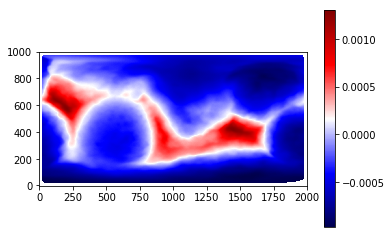

C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:244: RuntimeWarning: invalid value encountered in less
  
C:\Users\dschmidt\Documents\GitHub\Cuttings\plot.py:244: RuntimeWarning: invalid value encountered in greater
  


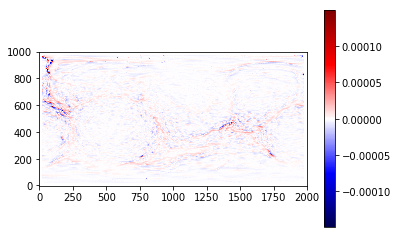

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

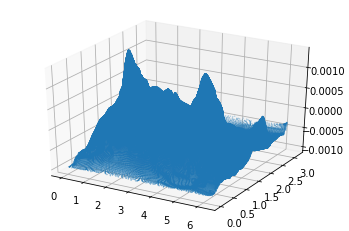

In [12]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0015, sigma=5)

Aggregate standard sphericity =  0.7981280878182759
Bounding box and ellispoids ratios :
a/b = 1.1253970224290684
a/c = 0.7986052230047715
b/c = 0.7096208778667762
a^2/bc = 0.8987479400658721
Bounding ellipsoid surface / Included ellipsoid surface = 4.629769141923483
Aggregate tomographed surface / Bounding ellipsoid surface = 0.6087389748119542
Aggregate tomographed surface / Middle ellipsoid surface = 1.1349154130181196
Aggregate tomographed surface / Included ellipsoid surface = 2.8183209210705216
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004122296725165272
 
data min max
theta 9.457817583695428e-05 6.282831257424613
phi 0.004219232299439599 3.1383202391324323
alpha 0.00010643799738909792 6.282786860643984
beta 0.005337890449743798 3.137452607855448
distance -0.000978281037359991 0.001317215427583201


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

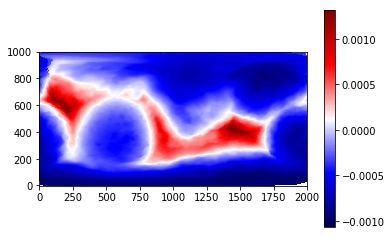

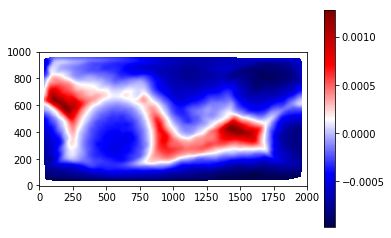

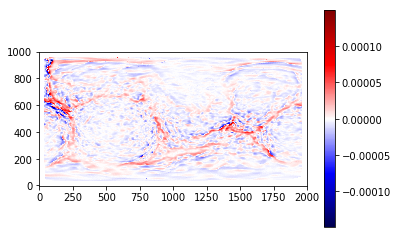

{'aggregate_standard_sphericity': 0.7981280878182759,
 'a/b': 1.1253970224290684,
 'a/c': 0.7986052230047715,
 'b/c': 0.7096208778667762,
 'a^2/bc': 0.8987479400658721,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 4.629769141923483,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.6087389748119542,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.1349154130181196,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 2.8183209210705216,
 'roughness_distance': array([[4.85003277e-01, 2.93891407e+00, 2.36298727e-05, 5.35307908e-01,
         2.88285326e+00],
        [5.12714535e-01, 2.94154872e+00, 2.17282569e-05, 5.64700830e-01,
         2.88544368e+00],
        [5.00604033e-01, 2.93747342e+00, 2.83311974e-05, 5.51876557e-01,
         2.88063900e+00],
        ...,
        [2.65703598e+00, 5.51337155e-01, 2.29022424e-04, 2.60675985e+00,
         6.69830419e-01],
        [2.65128184e+00, 5.46320167e-01, 2.18944879e-04, 2.60064184e+00,
        

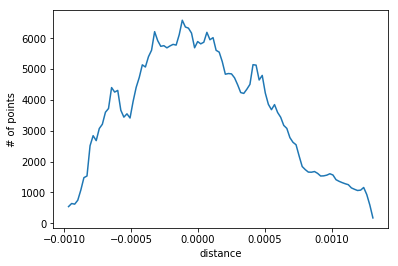

In [44]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0015, sigma=10)